## Step 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2. Load the data into dataframe

Read data

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\IMDbMovies-Clean.csv\IMDbMovies-Clean.csv')

Get first 5 rows in data

In [3]:
df.head()

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Release Year,Runtime (Minutes),Rating (Out of 10),Number of Ratings (in thousands),Budget (in millions),Gross in US & Canada (in millions),Gross worldwide (in millions),Opening Weekend in US & Canada,Gross Opening Weekend (in millions)
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2023.0,158.0,6.7,38.0,NaN,37.514,84.968,11.26.2023,20.639
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2023.0,157.0,7.2,37.0,100.0,105.043,191.729,11.19.2023,44.607
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,2023.0,118.0,6.8,117.0,NaN,NaN,0.421,NaN,NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,2023.0,102.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,2023.0,106.0,7.0,9.1,NaN,25.409,29.667,11.19.2023,10.306


- there is more than 1 value in column 'Director', 'Writer', and 'Main Genres'
- there is incorrect dtype in column 'Release Year', and 'Runtime (Minutes)'
- there is null value in data

Overall data shape

In [4]:
df.shape

(9083, 15)

Data has 9083 rows and 15 columns

## Step 3. Checking the types of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Title                                9083 non-null   object 
 1   Summary                              9083 non-null   object 
 2   Director                             9052 non-null   object 
 3   Writer                               8759 non-null   object 
 4   Main Genres                          9076 non-null   object 
 5   Motion Picture Rating                8285 non-null   object 
 6   Release Year                         9076 non-null   float64
 7   Runtime (Minutes)                    8918 non-null   float64
 8   Rating (Out of 10)                   8813 non-null   float64
 9   Number of Ratings (in thousands)     8813 non-null   float64
 10  Budget (in millions)                 5879 non-null   float64
 11  Gross in US & Canada (in milli

- the value in the data decreases drastically in the last few columns
- there is incorrect dtype in column 'Release Year', 'Runtime (Minutes)', and also 'Opening Weekend in US & Canada'

## Step 4. Dropping irrelevant columns

In [6]:
df.drop(columns=['Gross in US & Canada (in millions)', 
                 'Opening Weekend in US & Canada', 
                 'Gross Opening Weekend (in millions)'], 
        inplace=True)

Dropping 3 unnecessary columns:
- 'Gross in US & Canada (in millions)'
- 'Opening Weekend in US & Canada'
- 'Gross Opening Weekend (in millions)'

## Step 5. Renaming the columns

Renaming columns\
(do not use space ' ', use underscore instead '_')

In [7]:
df.rename(columns={'Title':'title', \
                   'Summary':'summary', \
                   'Director':'director', \
                   'Writer':'writer', \
                   'Main Genres':'genres',\
                   'Motion Picture Rating':'mp_rating',
                   'Release Year':'release_year', \
                   'Runtime (Minutes)':'runtime',\
                   'Rating (Out of 10)':'rating', \
                   'Number of Ratings (in thousands)':'people_rate',\
                   'Budget (in millions)':'budget',
                   'Gross worldwide (in millions)':'gross_worldwide'},
          inplace=True)

Results

In [8]:
df.columns

Index(['title', 'summary', 'director', 'writer', 'genres', 'mp_rating',
       'release_year', 'runtime', 'rating', 'people_rate', 'budget',
       'gross_worldwide'],
      dtype='object')

## Step 6. Dropping the duplicate rows

Searching duplicates

In [9]:
df.duplicated().sum()

0

Duplicate data held 0\
There may be a remake film with the same title\
use subsets to be more specific

In [10]:
df.loc[df.duplicated(subset=['title'])].head()

,title,summary,director,writer,genres,mp_rating,release_year,runtime,rating,people_rate,budget,gross_worldwide
28,Leo,Parthiban is a mild-mannered cafe owner in Kas...,Lokesh Kanagaraj,"Lokesh Kanagaraj,Rathna Kumar,Deeraj Vaidy","Action,Crime,Drama",NaN,2023.0,164.0,7.5,45.0,NaN,6.978
257,Napoleon,A film about the French general's youth and ea...,Abel Gance,Abel Gance,"Biography,Drama,History",NaN,1927.0,330.0,8.2,8.5,20.0,0.039
340,The Magnificent Seven,Seven gunmen from a variety of backgrounds are...,Antoine Fuqua,"Hideo Oguni,Shinobu Hashimoto,Akira Kurosawa","Action,Adventure,Drama",PG-13,2016.0,132.0,6.9,224.0,90.0,162.361
707,Mean Girls,"Cady Heron is a hit with The Plastics, the A-l...",Mark Waters,"Tina Fey,Rosalind Wiseman",Comedy,PG-13,2004.0,97.0,7.1,416.0,17.0,130.126
914,Fantastic Four,A group of astronauts gain superpowers after a...,Tim Story,"Stan Lee,Mark Frost,Michael France","Action,Adventure,Fantasy",PG-13,2005.0,106.0,5.7,340.0,100.0,333.536


It's true that there is a film with the same title\
take one example

In [11]:
df.query('title == "Fantastic Four"')

,title,summary,director,writer,genres,mp_rating,release_year,runtime,rating,people_rate,budget,gross_worldwide
167,Fantastic Four,Four young outsiders teleport to an alternate ...,Josh Trank,"Josh Trank,Simon Kinberg,Jeremy Slater","Action,Adventure,Sci-Fi",PG-13,2015.0,100.0,4.3,174.0,120.0,167.883
914,Fantastic Four,A group of astronauts gain superpowers after a...,Tim Story,"Stan Lee,Mark Frost,Michael France","Action,Adventure,Fantasy",PG-13,2005.0,106.0,5.7,340.0,100.0,333.536
2340,Fantastic Four,One of Marvel's most iconic families makes it ...,Matt Shakman,"Josh Friedman,Stan Lee,Jeff Kaplan","Action,Adventure,Sci-Fi",NaN,2025.0,NaN,NaN,NaN,NaN,NaN


They are different, only the title is the same

## Step 7. Dropping the missing or null values.

Detailed information about null values in the data

In [12]:
df.isna().sum()

title                 0
summary               0
director             31
writer              324
genres                7
mp_rating           798
release_year          7
runtime             165
rating              270
people_rate         270
budget             3204
gross_worldwide    1955
dtype: int64

Most of the data is missing in the last 5 columns

Dropping null value in data

In [13]:
df.dropna(inplace=True)

## Step 8. Changing data type

In [14]:
df['release_year'] = df['release_year'].astype(int)
df['runtime'] = df['runtime'].astype(int)

Changing columns dtype:
- 'release_year' to integer
- 'runtime' to integer

## Step 9. Reindex columns and results

In [15]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5087 non-null   object 
 1   summary          5087 non-null   object 
 2   director         5087 non-null   object 
 3   writer           5087 non-null   object 
 4   genres           5087 non-null   object 
 5   mp_rating        5087 non-null   object 
 6   release_year     5087 non-null   int32  
 7   runtime          5087 non-null   int32  
 8   rating           5087 non-null   float64
 9   people_rate      5087 non-null   float64
 10  budget           5087 non-null   float64
 11  gross_worldwide  5087 non-null   float64
dtypes: float64(4), int32(2), object(6)
memory usage: 437.3+ KB


- After dropping a few  rows and columns, data now has 5087 Rows and 12 columns
- Columns already rename
- Columns dtype already change
- There is no null value remaining
- There is no duplicate value

## Step. 10 Statistical Summaries of Columns

Get numerical description of the data

In [16]:
df.describe()

,release_year,runtime,rating,people_rate,budget,gross_worldwide
count,5087.00000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000
mean,2002.21093,109.281305,6.584667,154.340259,67.656352,116.209030
std,15.41801,25.168689,0.968148,223.322663,697.626306,203.327839
min,1920.00000,2.000000,1.300000,1.100000,0.000000,0.000000
25%,1994.00000,96.000000,6.000000,37.000000,9.000000,13.012500
50%,2005.00000,107.000000,6.600000,80.000000,22.000000,45.640000
75%,2014.00000,121.000000,7.300000,177.000000,50.000000,129.753500
max,2023.00000,393.000000,9.300000,2800.000000,30000.000000,2923.706000


There is anomalies about the minimum and maximum values that indicate outlier for column:
- min value in column 'release_year'
- min and max value in column 'runtime'
- min and max value in column 'people_rate'
- min and max value in column 'budget'
- min and max value in column 'gross_worldwide'

Mean ~ 50% (Median) for  column 'release_year', 'runtime', 'rating' indicating a symmetrical distribution.\
Mean > 50% (Median) for  column 'people_rate', 'budget', 'gross_worldwide' indicates a positively skewed distribution

Get categorical description of the data

In [17]:
df.describe(include='object')

,title,summary,director,writer,genres,mp_rating
count,5087,5087,5087,5087,5087,5087
unique,4954,5086,2139,4542,343,19
top,King Kong,A kind-hearted street urchin and a power-hungr...,Steven Spielberg,John Hughes,"Comedy,Drama,Romance",R
freq,3,2,33,14,189,2240


only 'mp_rating' column has a useable unique value

### Step 11. Univariate analysis

Distribution with histogram

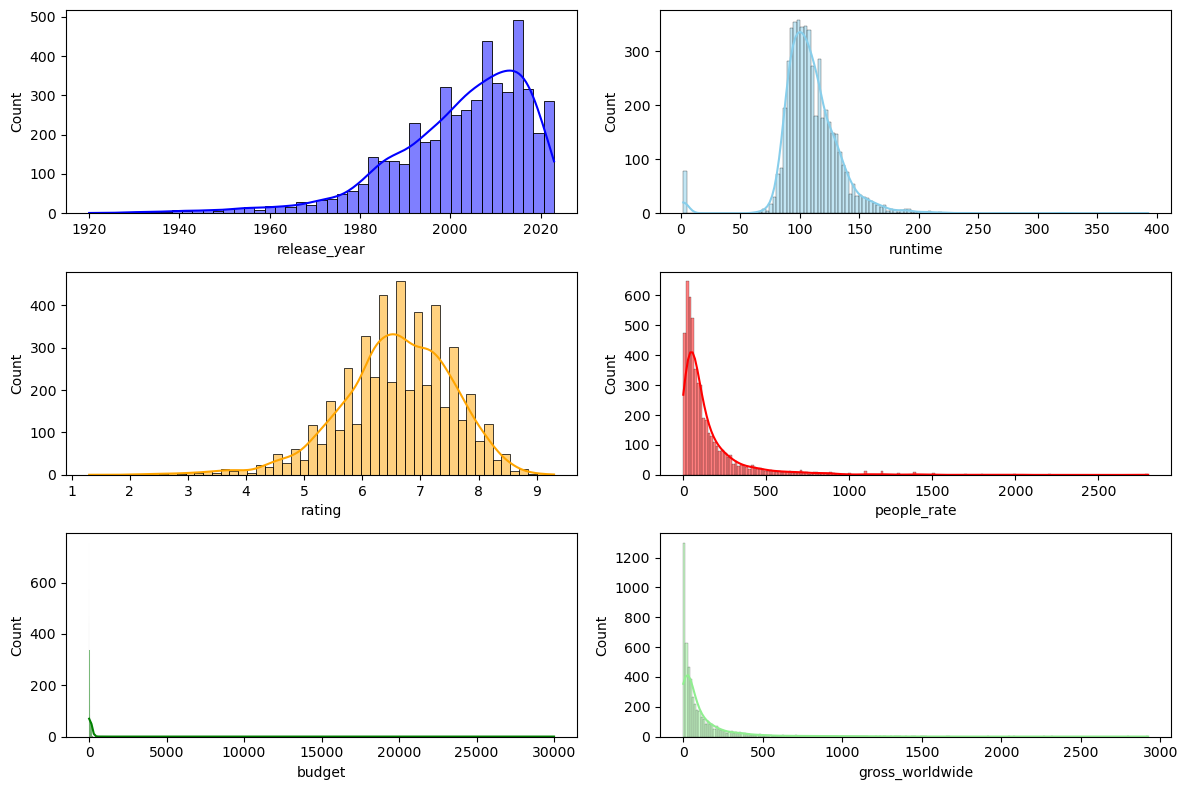

In [18]:
fig, axs = plt.subplots(3,2, figsize=(12, 8))
      
sns.histplot(data= df, x='release_year', kde=True, color="blue", ax=axs[0,0])
sns.histplot(data= df, x='runtime', kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= df, x='rating', kde=True, color="orange", ax=axs[1,0])
sns.histplot(data= df, x='people_rate', kde=True, color="red", ax=axs[1,1])
sns.histplot(data= df, x='budget', kde=True, color="green", ax=axs[2,0])
sns.histplot(data= df, x='gross_worldwide', kde=True, color="lightgreen", ax=axs[2,1])

plt.tight_layout()
plt.show()

- Column 'release_year' is not symmetrical distribution but negatively skewed distribution
- Column 'runtime', 'rating' is indeed symmetrical distribution
- Column 'people_rate', 'budget', 'gross_worldwide' indicates a positively skewed distribution

Detecting outliers with boxplot

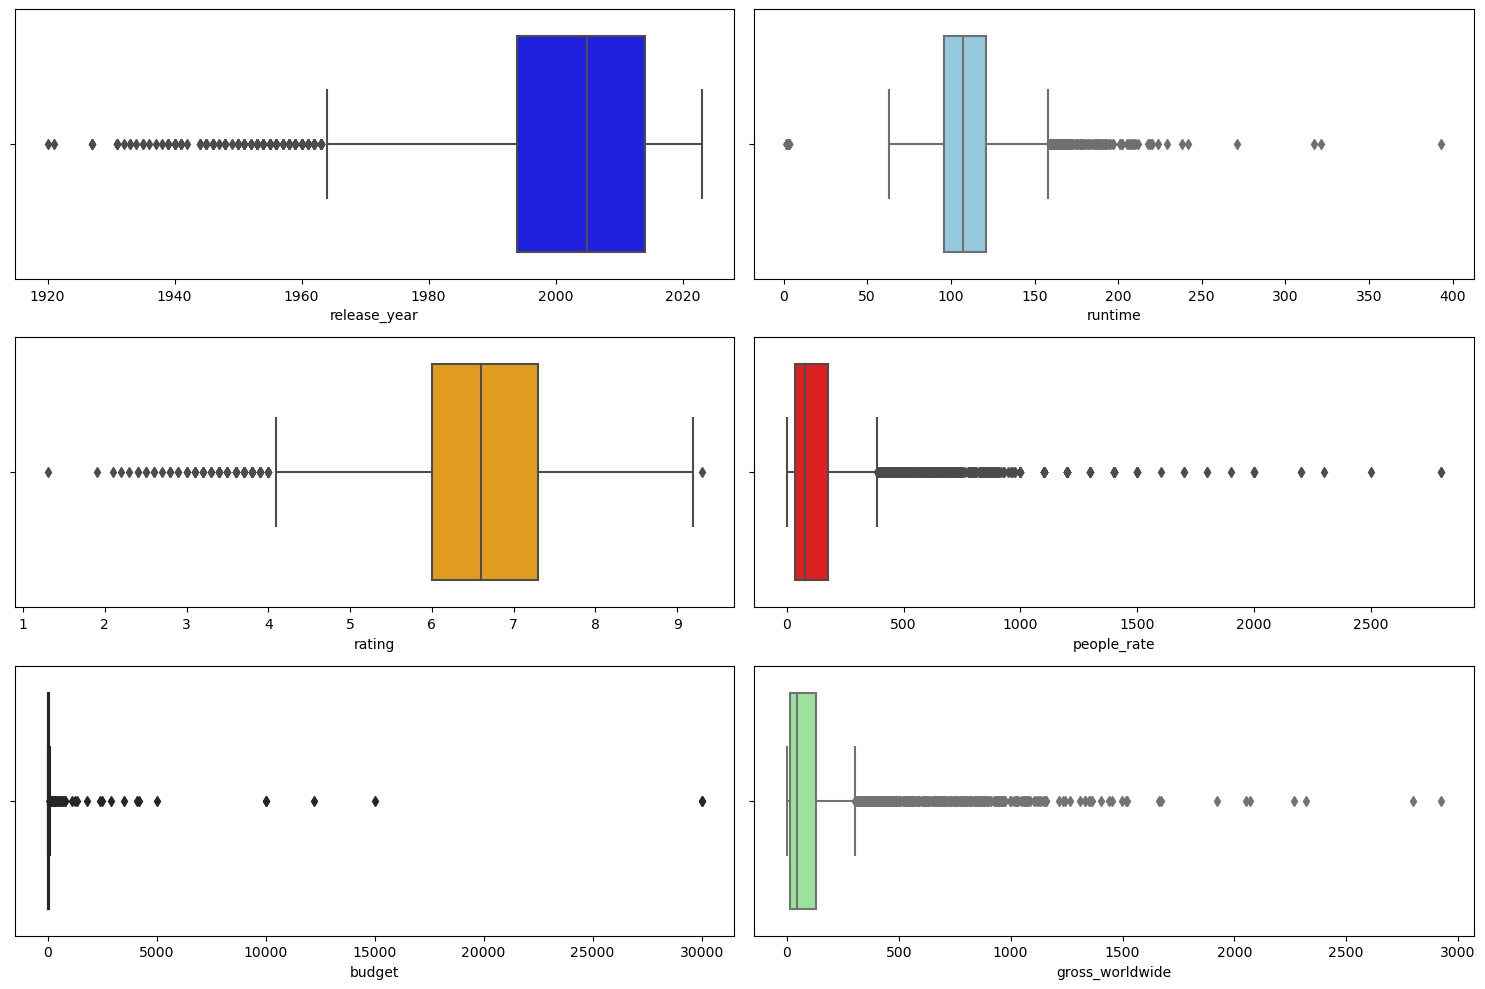

In [19]:
fig, axs = plt.subplots(3,2, figsize=(15, 10))
      
sns.boxplot(data= df, x='release_year', color="blue", ax=axs[0,0])
sns.boxplot(data= df, x='runtime', color="skyblue", ax=axs[0,1])
sns.boxplot(data= df, x='rating', color="orange", ax=axs[1,0])
sns.boxplot(data= df, x='people_rate', color="red", ax=axs[1,1])
sns.boxplot(data= df, x='budget', color="green", ax=axs[2,0])
sns.boxplot(data= df, x='gross_worldwide', color="lightgreen", ax=axs[2,1])

plt.tight_layout()
plt.show()

There is indeed outlier in every columns/features

Locating most frequent director

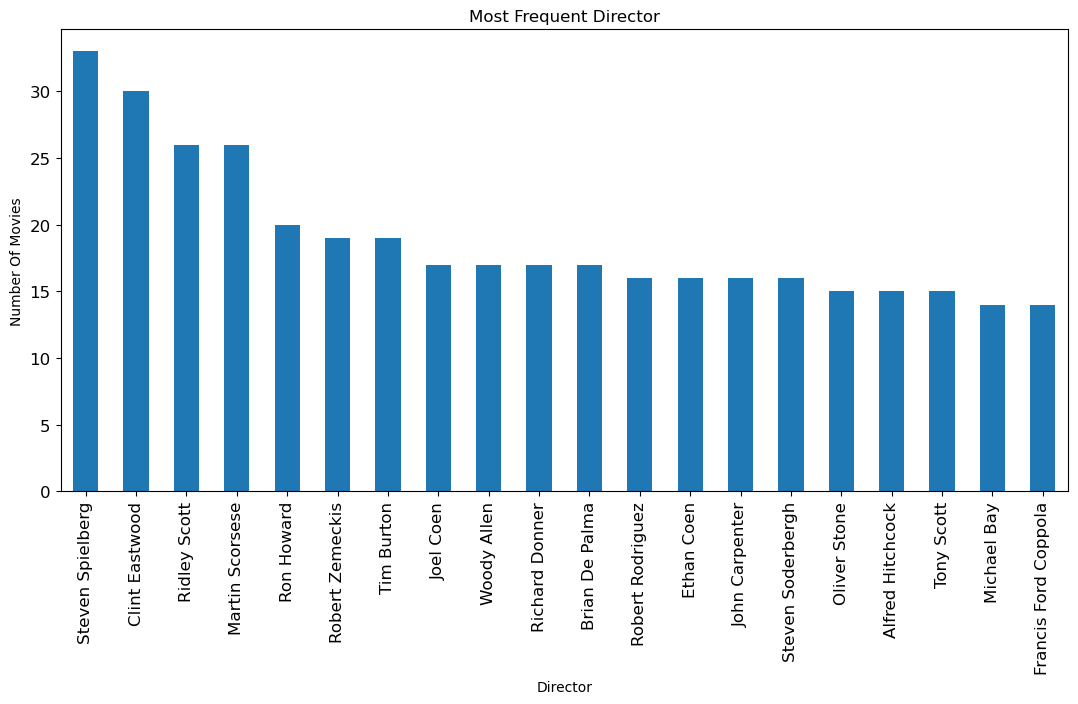

In [20]:
def count_df(x):
    df_plot = df[x].str.cat(sep = ',')
    data = pd.Series(df_plot.split(','))
    return data

count_director = count_df('director').value_counts()
#print(count_director[:20])

ax = count_director.iloc[:20].plot(kind='bar',
                              figsize=(13,6),
                              fontsize=12,
                              title="Most Frequent Director")

ax.set_xlabel('Director')
ax.set_ylabel("Number Of Movies")

plt.show()

Locating most frequent writer

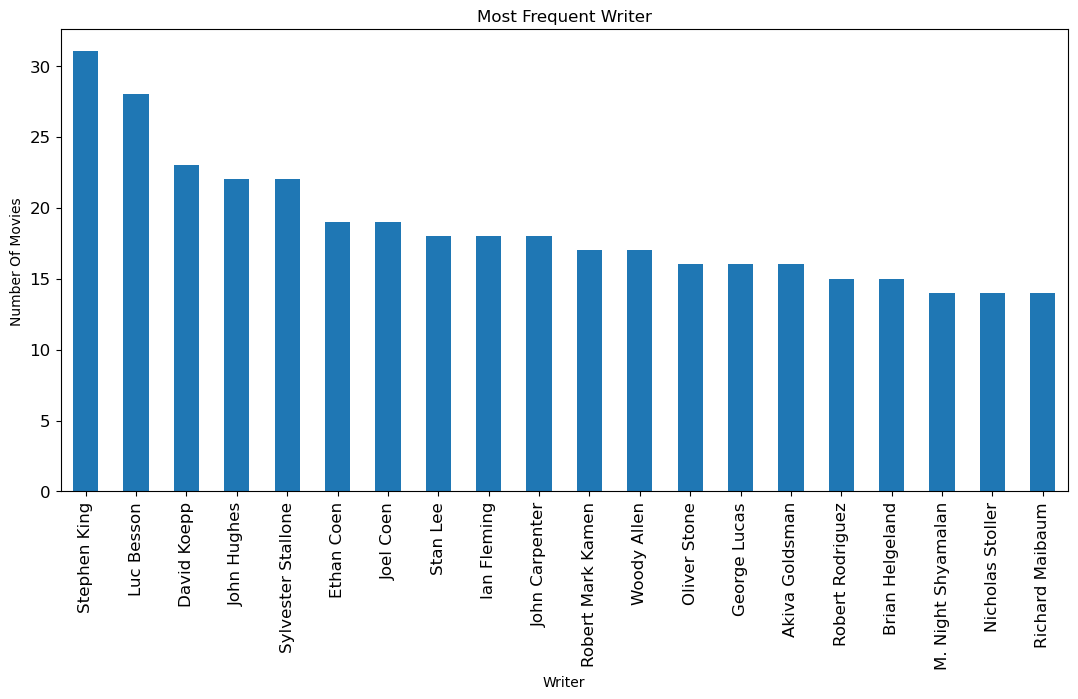

In [21]:
count_writer = count_df('writer').value_counts()
#print(count_writer[:20])

ax = count_writer.iloc[:20].plot(kind='bar',
                              figsize=(13,6),
                              fontsize=12,
                              title="Most Frequent Writer")

ax.set_xlabel('Writer')
ax.set_ylabel("Number Of Movies")

plt.show()

Locating most frequent genre

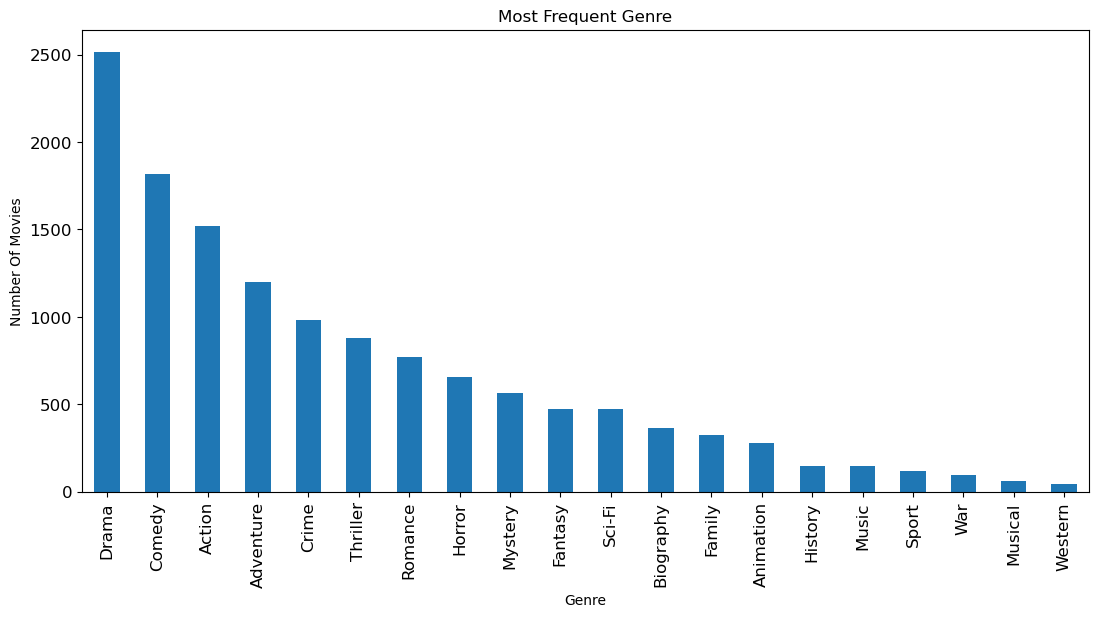

In [22]:
total_genre_movies = count_df('genres').value_counts()
#print(total_genre_movies[:20])

ax = total_genre_movies.iloc[:20].plot(kind='bar',
                              figsize=(13,6),
                              fontsize=12,
                              title="Most Frequent Genre")

ax.set_xlabel('Genre')
ax.set_ylabel("Number Of Movies")

plt.show()

Genre contribution using pie chart

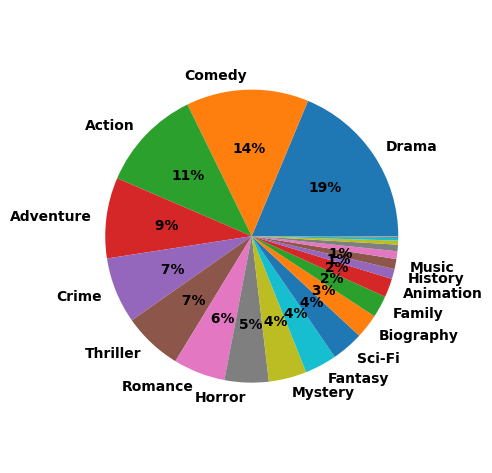

In [23]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

Locating most frequent motion picture rating

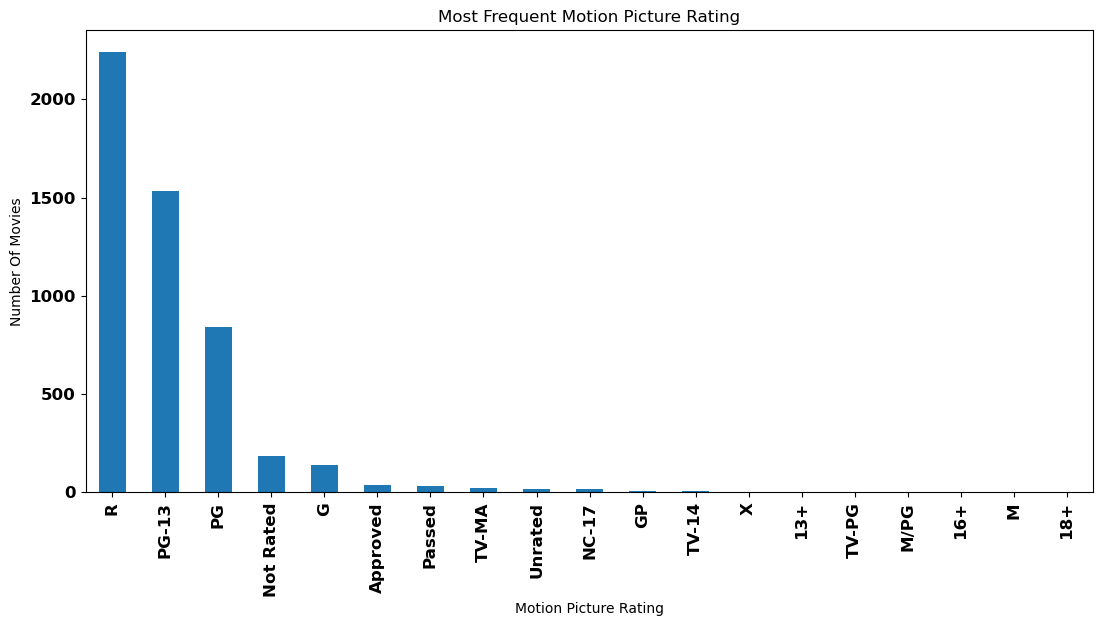

In [24]:
count_mp_rating = df['mp_rating'].value_counts()
#print(count_mp_rating[:20])

ax = count_mp_rating.iloc[:20].plot(kind='bar',
                              figsize=(13,6),
                              fontsize=12,
                              title="Most Frequent Motion Picture Rating")

ax.set_xlabel('Motion Picture Rating')
ax.set_ylabel("Number Of Movies")

plt.show()

Locating top 5 year movie released

release_year
2011    179
2016    175
2013    172
2018    164
2015    163
Name: count, dtype: int64


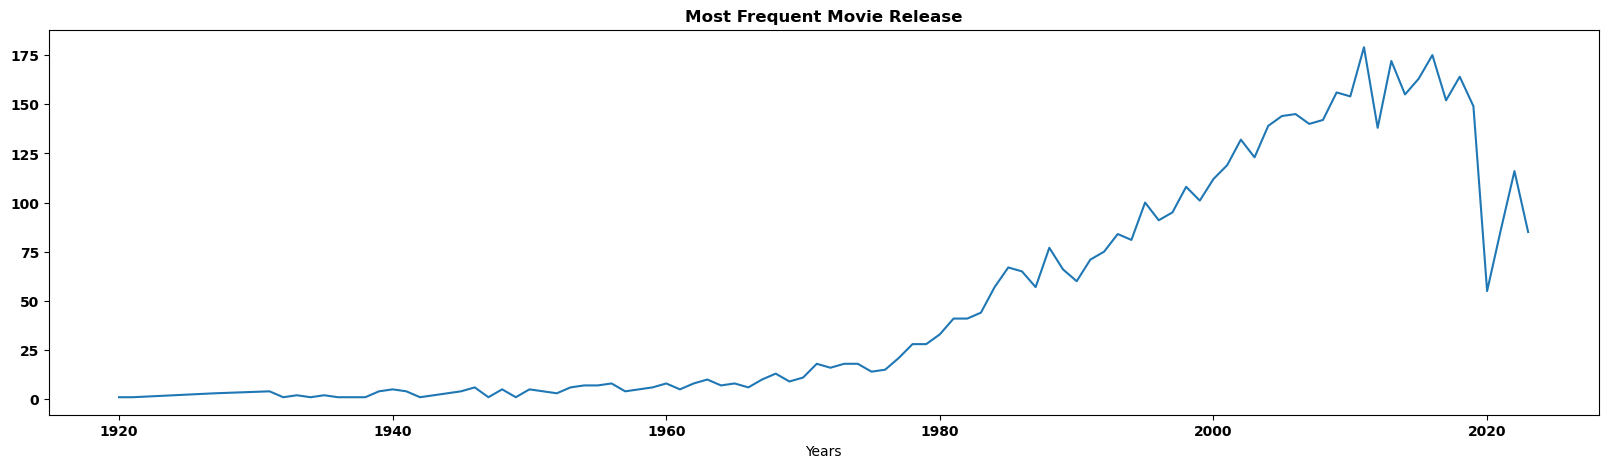

In [25]:
top_years = df['release_year'].value_counts()
print(top_years[:5])

fig,axs=plt.subplots(figsize=(20,5))
g=df.groupby('release_year')['release_year'].value_counts().plot.line()
g.set_title("Most Frequent Movie Release", weight = "bold")
g.set_xlabel("Years")
plt.show()

## Step 12. Bivariate Analysis

Locating feature relationship using correlation

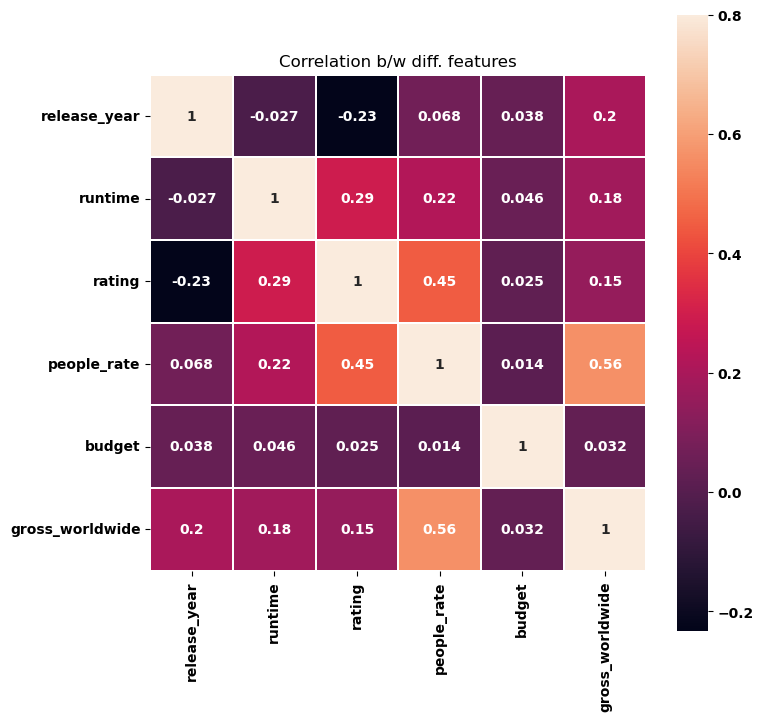

In [26]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True)
plt.title('Correlation b/w diff. features')
plt.show()

There is moderate correlation betwen:
- 'people_rate'& 'Rating'
- 'people_rate'&'gross_worldwide'

Checking the related feature

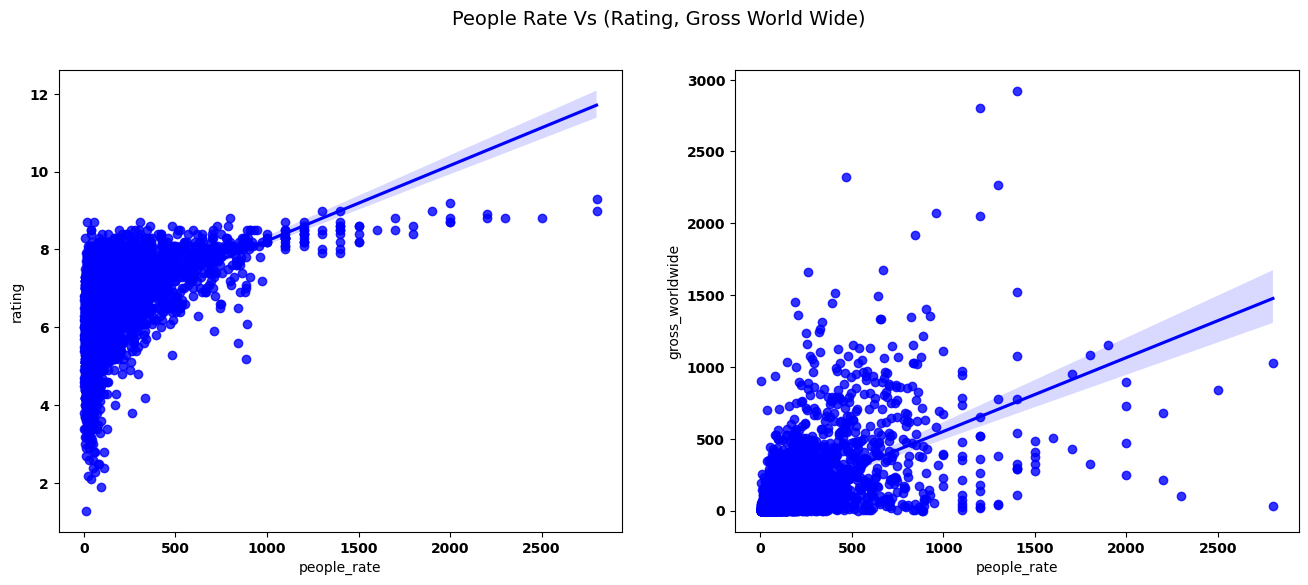

In [27]:
fig, axes = plt.subplots(1,2,figsize = (16,6))
fig.suptitle("People Rate Vs (Rating, Gross World Wide)",fontsize=14)

sns.regplot(x=df['people_rate'], y=df['rating'],color='b',ax=axes[0])
sns.regplot(x=df['people_rate'], y=df['gross_worldwide'],color='b',ax=axes[1])

plt.show()

## Step 13. Overall Summary

1. Data contains some NULL values
2. Data do not contains duplicated rows
3. There is outlier in every column
4. Most frequent genre are Drama or atleast contain drama
5. Most frequent Motion Picture Rate are R-Rated
6. Most movie release in year 1978 and keep increasing
7. From correlation heatmap, there is highly correlated between people_rate & rating, people_rate & gross_worldwide